In [ ]:
!pip install tqdm
!pip install wordcloud
!pip install textblob
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Libraries
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Import Data
final_data = pd.read_csv("/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/Coursera_Final_Merge_clean_Data.csv")
final_data = final_data[final_data["clean_reviews"].isna() == False]

In [ ]:
## To understand the sentiment for each review for different aspects
df_inp_sia = final_data

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define aspects
aspects = ["course","content","audio","video","material","money","lecture","instructor","professor","assignment","quiz"]

df_out_sia = {}

for index, row in tqdm(df_inp_sia.iterrows(), total = len(df_inp_sia)):
    # Split the review into sentences and tokenize each sentence
    review = row["clean_reviews"].lower()
    sentences = nltk.sent_tokenize(review)

    # For each aspect, extract the sentences that mention the aspect
    aspect_sentences = {}
    for aspect in aspects:
        aspect_sentences[aspect] = []
        for sentence in sentences:
            if aspect in sentence:
                aspect_sentences[aspect].append(sentence)

    # Calculate the sentiment score for each aspect sentence using VADER sentiment analysis
    aspect_sentiments = {}
    for aspect in aspects:
        aspect_sentiments[aspect] = []
        for sentence in aspect_sentences[aspect]:
            sentiment = sia.polarity_scores(sentence)["compound"]
            aspect_sentiments[aspect].append(sentiment)

    # Calculate the average sentiment score for each aspect
    aspect_sentiment_scores = {}
    aspect_sentiment_scores["Course_Category"] = row["subject"]
    aspect_sentiment_scores["Course_Name"] = row["name"]
    aspect_sentiment_scores["Review"] = row["reviews"]
    aspect_sentiment_scores["Clean_Review"] = row["clean_reviews"]
    aspect_sentiment_scores["rating"] = row["rating"]
    aspect_sentiment_scores["I_Category"] = row["I_Category"]
    aspect_sentiment_scores["institution"] = row["institution"]
    for aspect in aspects:
        if len(aspect_sentences[aspect]) > 0:
            aspect_sentiment_scores[aspect] = sum(aspect_sentiments[aspect]) / len(aspect_sentences[aspect])
        else:
            aspect_sentiment_scores[aspect] = 0

    df_out_sia[index] = aspect_sentiment_scores

df_out_sia = pd.DataFrame.from_dict(df_out_sia,orient='index')

100%|██████████| 424380/424380 [02:28<00:00, 2860.26it/s]


In [ ]:
#df_out_sia.to_csv('/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/df_out_sia.csv', index=False)
#df_out_sia=pd.read_csv('/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/df_all_aspect_sentiments.csv')

In [ ]:
aspects_sel_cols = ["course","content","material","lecture","instructor","professor","audio","video","assignment","quiz","money"]

In [ ]:
grp_df_course_bin = df_out_sia.groupby(["Course_Category","Course_Name"])[aspects_sel_cols].agg({lambda x: x.mean()}).reset_index()
grp_df_course_bin.columns = grp_df_course_bin.columns.droplevel(1)
grp_df_course_bin[aspects_sel_cols] = (grp_df_course_bin[aspects_sel_cols]<0)*1
grp_df_course_bin["ttl_aspects"] = grp_df_course_bin[aspects_sel_cols].sum(axis=1)

In [ ]:
grp_df_course_bin[grp_df_course_bin["ttl_aspects"]>=3]

,Course_Category,Course_Name,course,content,material,lecture,instructor,professor,audio,video,assignment,quiz,money,ttl_aspects
40,Arts and Humanities,Write A Feature Length Screenplay For Film Or ...,0,0,0,1,0,1,0,0,1,0,0,3
41,Arts and Humanities,Write Your First Novel,0,1,0,0,0,0,0,0,1,0,1,3
174,Computer Science,Embedded Software and Hardware Architecture,0,0,1,1,0,0,0,1,0,0,0,3
270,Data Science,"Introduction to Trading, Machine Learning & GCP",0,0,0,0,0,0,1,0,1,0,1,3
330,Health,Epigenetic Control of Gene Expression,1,0,0,1,0,1,0,0,0,0,0,3
340,Health,Health Behavior Change: From Evidence to Action,0,1,0,0,1,0,0,1,0,0,0,3
375,Information Technology,Building Containerized Applications on AWS,0,0,0,1,0,0,0,1,0,1,0,3
381,Information Technology,"Cybersecurity Roles, Processes & Operating Sys...",0,0,0,1,0,0,1,0,0,1,0,3
391,Information Technology,Getting Started with Azure,0,0,1,0,0,0,0,1,0,1,1,4
494,Physical Science and Engineering,Fundamentals of Engineering Exam Review,0,0,0,1,0,0,0,1,0,1,1,4


In [ ]:
grp_df_course_bin.groupby(['ttl_aspects'])['ttl_aspects'].count()

ttl_aspects
0    411
1    128
2     36
3      8
4      4
Name: ttl_aspects, dtype: int64

In [ ]:
#Result #1
df_pie1 = grp_df_course_bin.groupby(["ttl_aspects"]).agg({"Course_Name":"count"}).reset_index()
df_pie1

,ttl_aspects,Course_Name
0,0,411
1,1,128
2,2,36
3,3,8
4,4,4


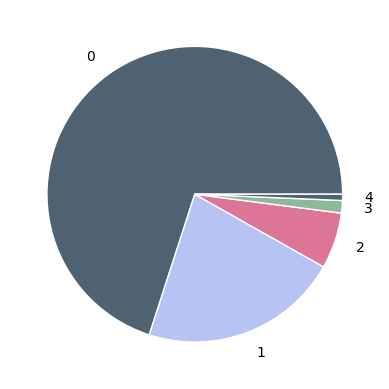

In [ ]:
# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

grouped_df = grp_df_course_bin.groupby(["ttl_aspects"]).agg({"Course_Name": "count"}).reset_index()
labels = grouped_df["ttl_aspects"]
counts = grouped_df["Course_Name"]

# Use it thanks to the color argument
plt.pie(counts, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);

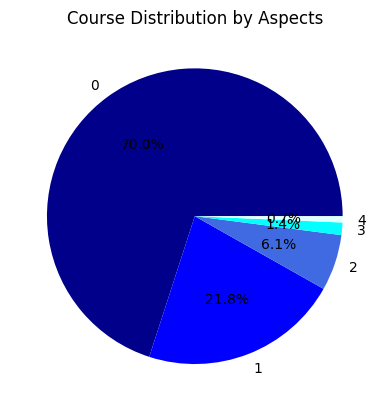

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Groupby and aggregation
grouped_df = grp_df_course_bin.groupby(["ttl_aspects"]).agg({"Course_Name": "count"}).reset_index()

# Extract data for the pie chart
labels = grouped_df["ttl_aspects"]
counts = grouped_df["Course_Name"]

colors = ['darkblue','blue', 'royalblue', 'cyan', 'lightcyan']
cmap = LinearSegmentedColormap.from_list("my_cmap", colors)

# Create the pie chart with gradient colors
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=cmap(np.linspace(0, 1, len(labels))))
plt.title("Course Distribution by Aspects")
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

color_discrete_map = {0:'#005F73',
1:'#0A9396',
2:'#EE9B00',
3:'#CA6702',
4:'#BB3E03'}

fig = px.pie(df_pie1, values="Course_Name", names='ttl_aspects', color='ttl_aspects',
             color_discrete_map=color_discrete_map)
# Add title to the pie chart
fig.update_layout(title={
    'text': "Course Counts with Problematic Aspects",
    'x': 0.5,
    'y': 0.98,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 18}
})


# Add custom legend header using annotations
fig.add_annotation(
    go.layout.Annotation(
        text='Total Aspects',
        xref='paper',
        yref='paper',
        x=1.18,
        y=1.05,
        showarrow=False,
        font={'size': 14, 'color': 'black'},
        align='center'
    )
)
fig.update_layout(
    width=500,  # set width to 800 pixels
    height=400  # set height to 600 pixels
)

fig.show()

In [ ]:
# Result #2
df_pie2 = grp_df_course_bin[grp_df_course_bin["ttl_aspects"]>=1][aspects_sel_cols].agg({lambda x: x.sum()})
df_pie2.iloc[0].tolist()

[3, 5, 4, 12, 6, 9, 55, 18, 17, 41, 70]

In [ ]:
df_pie2

,course,content,material,lecture,instructor,professor,audio,video,assignment,quiz,money
<lambda>,3,5,4,12,6,9,55,18,17,41,70


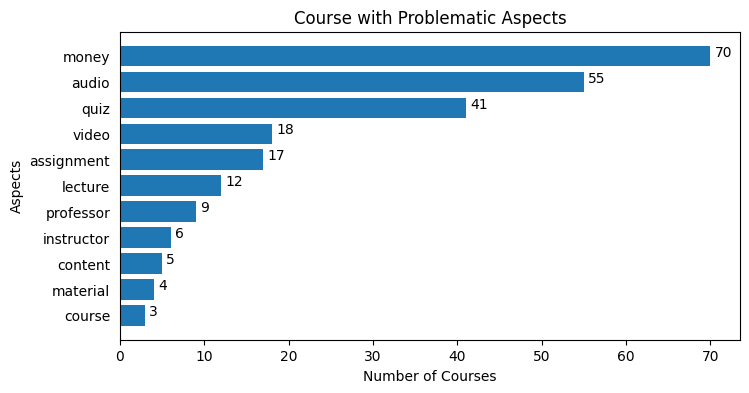

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the values and index in descending order
df_sorted = df_pie2.iloc[0].sort_values(ascending=True)
height = df_sorted.tolist()
bars = df_sorted.index.tolist()
y_pos = np.arange(len(bars))

plt.figure(figsize=[8,4])

# Create horizontal bars
plt.barh(y_pos, height)

# Create names on the y-axis
plt.yticks(y_pos, bars)

# Set y-axis ticks in a specific order
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelright=False, labelrotation=0)

# Add labels to the bars
for i, v in enumerate(height):
    plt.text(v + 0.5, i, str(v), color='black')

# Add title and axis labels
plt.title("Course with Problematic Aspects")
plt.xlabel("Number of Courses")
plt.ylabel("Aspects")
plt.savefig('/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/bar_graph.png')
# Show graphic
plt.show()


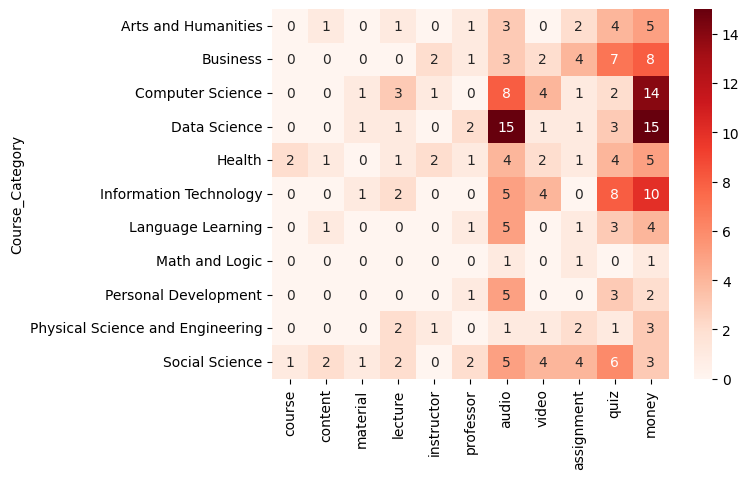

<Figure size 800x400 with 0 Axes>

In [ ]:
# Result #3
rsl2 = grp_df_course_bin[grp_df_course_bin["ttl_aspects"]>=1].groupby(["Course_Category"])[aspects_sel_cols].agg({lambda x: x.sum()})
rsl2.columns = rsl2.columns.droplevel(1)

#cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(rsl2, cmap="Reds", annot=True, fmt=".0f", cbar=True)
plt.figure(figsize=[8,4])
plt.savefig('/content/drive/MyDrive/CMU SUBJECTS/DATA/Clean Data/heatmap.png')
plt.show()

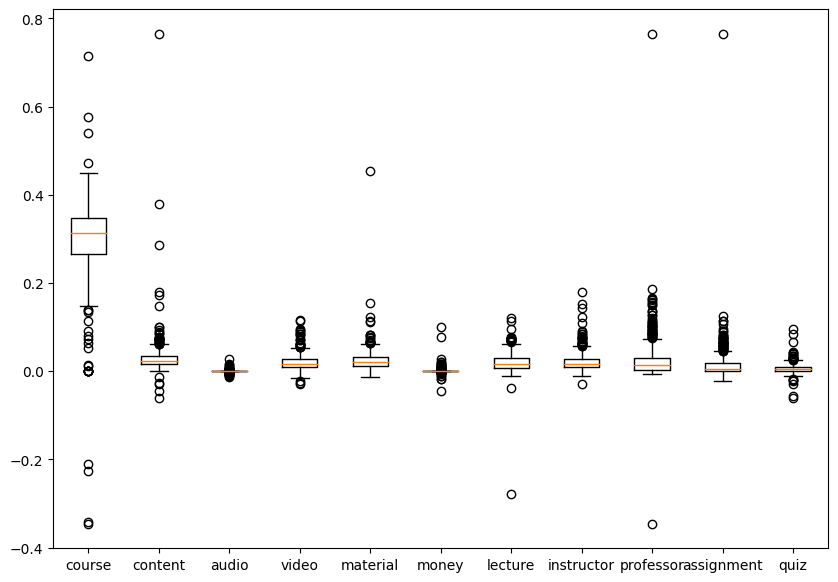

In [ ]:
# Result #4
fig = plt.figure(figsize =(10, 7))
grp_df_course = df_out_sia.groupby(["Course_Name"])[aspects_sel_cols].agg({lambda x: x.mean()}).reset_index()
grp_df_course.columns = grp_df_course.columns.droplevel(1)
plt.boxplot(grp_df_course[aspects_sel_cols], labels = aspects_sel_cols)
plt.show()

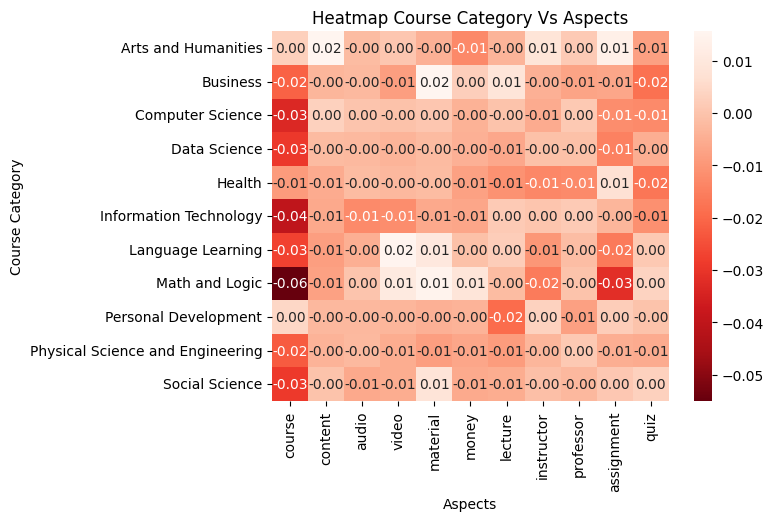

In [ ]:
# Result #5.1
temp = df_out_sia[(df_out_sia["rating"]==1)]
grp_df_course_cat = temp.groupby(["Course_Category"])[aspects_sel_cols].agg({lambda x: x.mean()})
grp_df_course_cat.columns = grp_df_course_cat.columns.droplevel(1)

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(grp_df_course_cat, cmap=cmap, annot=True, fmt=".2f", cbar=True)

plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")
plt.show()

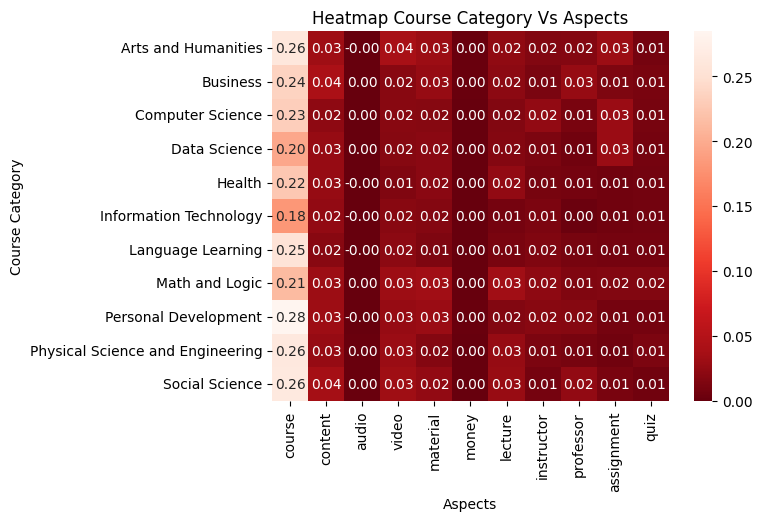

In [ ]:
# Result #5.2
temp = df_out_sia[(df_out_sia["rating"]==2) | (df_out_sia["rating"]==3) | (df_out_sia["rating"]==4)]
grp_df_course_cat = temp.groupby(["Course_Category"])[aspects_sel_cols].agg({lambda x: x.mean()})
grp_df_course_cat.columns = grp_df_course_cat.columns.droplevel(1)

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(grp_df_course_cat, cmap=cmap, annot=True, fmt=".2f", cbar=True)

plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")
plt.show()

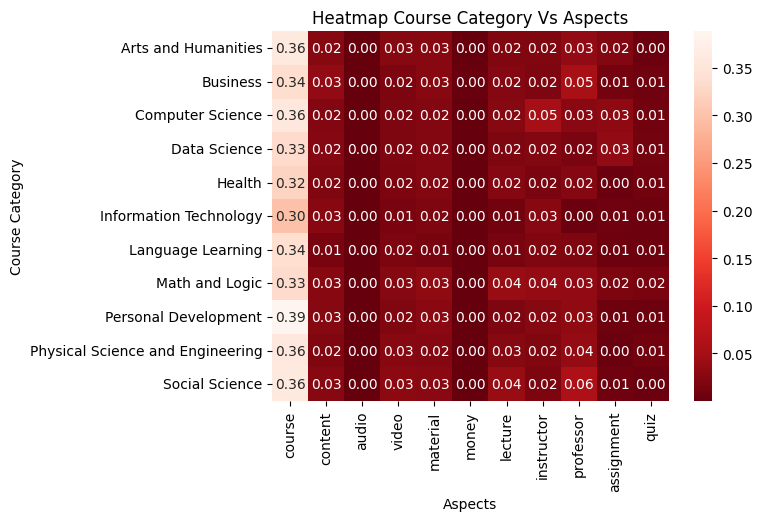

In [ ]:
# Result #5.3
temp = df_out_sia[df_out_sia["rating"]==5]
grp_df_course_cat = temp.groupby(["Course_Category"])[aspects_sel_cols].agg({lambda x: x.mean()})
grp_df_course_cat.columns = grp_df_course_cat.columns.droplevel(1)

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(grp_df_course_cat, cmap=cmap, annot=True, fmt=".2f", cbar=True)

plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")
plt.show()

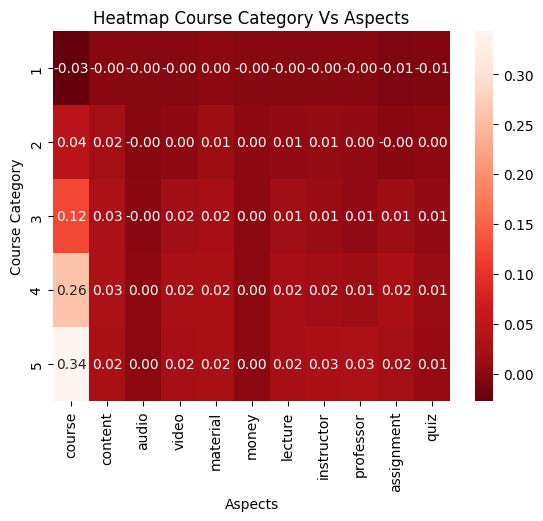

In [ ]:
# Result #6
grp_df_course_rating = df_out_sia.groupby(["rating"])[aspects_sel_cols].agg({lambda x: x.mean()})
grp_df_course_rating.columns = grp_df_course_rating.columns.droplevel(1)

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(grp_df_course_rating, cmap=cmap, annot=True, fmt=".2f", cbar=True)

plt.title("Heatmap Course Category Vs Aspects")
plt.xlabel("Aspects")
plt.ylabel("Course Category")
plt.show()

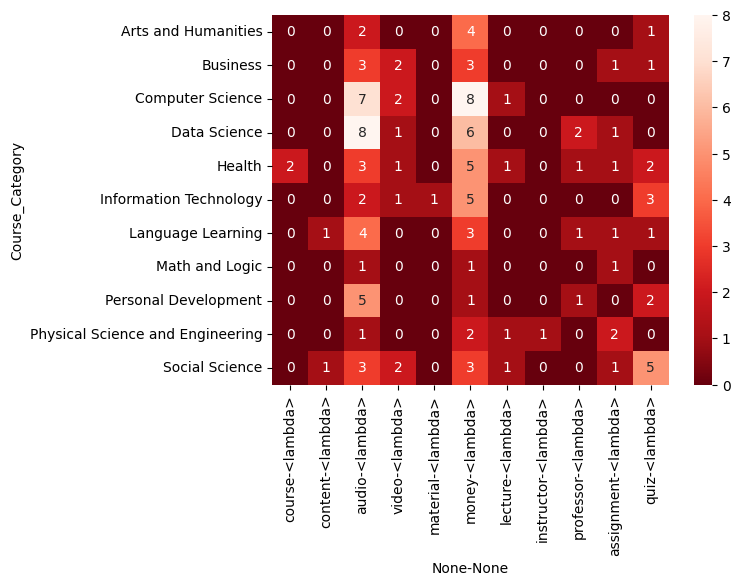

In [ ]:
# Result #7
#temp = df_out_sia[df_out_sia["rating"]==1]

grp_df_course_inst_bin = df_out_sia.groupby(["Course_Category","institution"])[aspects_sel_cols].agg({lambda x: x.mean()}).reset_index()
grp_df_course_inst_bin.columns = grp_df_course_inst_bin.columns.droplevel(1)
grp_df_course_inst_bin[aspects_sel_cols] = (grp_df_course_inst_bin[aspects_sel_cols]<0)*1
grp_df_course_inst_bin["ttl_aspects"] = grp_df_course_inst_bin[aspects_sel_cols].sum(axis=1)

grp_df_course_inst_bin.groupby(["ttl_aspects"]).agg({"Course_Category":"count"})

# Result #3
rsl2 = grp_df_course_inst_bin[grp_df_course_inst_bin["ttl_aspects"]>=1].groupby(["Course_Category"])[aspects_sel_cols].agg({lambda x: x.sum()})

cmap = list(reversed(sns.color_palette("Reds", n_colors=256)))
sns.heatmap(rsl2, cmap=cmap, annot=True, fmt=".0f", cbar=True)

plt.show()

In [ ]:
# Result #8
grp_df_course_inst_bin[grp_df_course_inst_bin["ttl_aspects"]>1]

,Course_Category,institution,course,content,audio,video,material,money,lecture,instructor,professor,assignment,quiz,ttl_aspects
4,Arts and Humanities,Michigan State University,0,0,1,0,0,1,0,0,0,0,0,2
16,Arts and Humanities,University of Toronto,0,0,1,0,0,0,0,0,0,0,1,2
83,Computer Science,Saint Petersburg State University,0,0,0,1,0,0,1,0,0,0,0,2
91,Computer Science,"University of California, Santa Cruz",0,0,1,0,0,1,0,0,0,0,0,2
92,Computer Science,University of Colorado Boulder,0,0,0,1,0,1,0,0,0,0,0,2
108,Data Science,Duke University,0,0,1,0,0,1,0,0,0,0,0,2
118,Data Science,New York Institute of Finance,0,0,1,0,0,1,0,0,0,1,0,3
120,Data Science,Rice University,0,0,1,0,0,1,0,0,0,0,0,2
158,Health,The University of Melbourne,1,0,0,0,0,0,1,0,1,0,0,3
164,Health,"University of California, Davis",0,0,0,0,0,1,0,0,0,1,0,2
